#### Импорт библиотек

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

#### Загрузка данных

In [63]:
df = pd.read_excel('training.xlsb', engine='pyxlsb')

In [11]:

test = pd.read_excel('test.xlsb', engine='pyxlsb')

#### Быстрый EDA

In [21]:
print(df.head())

<bound method NDFrame.head of           ID         A         B       C       D         E         F   G  \
0          1  0.198778  0.099389    0.00  799.90  1.777556  0.888778  13   
1          2  0.043000  0.021264   49.97  173.03  0.384511  0.190143  13   
2          3  0.067073  0.067073    0.00  329.90  0.599818  0.599818  13   
3          4  0.052700  0.052700    0.00  235.65  0.471300  0.471300  13   
4          5  0.141880  0.141880    0.00  634.45  1.268900  1.268900  13   
...      ...       ...       ...     ...     ...       ...       ...  ..   
89729  89730  0.027941  0.014844   25.00  474.00  0.557647  0.296250  20   
89730  89731  0.120017  0.068581  179.96  720.03  1.200050  0.685743  10   
89731  89732  0.153033  0.122427   29.01  550.99  0.459158  0.367327   3   
89732  89733  0.107575  0.043030   53.82  215.18  0.537950  0.215180   5   
89733  89734  0.095750  0.095750   57.48  172.42  0.287367  0.287367   3   

          H      I  ...       P          Q    R          

In [17]:
print(df.shape)

(89734, 26)


In [18]:
print(df.groupby('MARKER').size())

MARKER
0    89392
1      342
dtype: int64


In [19]:
print(df.isnull().sum())

ID        0
A         0
B         0
C         0
D         0
E         0
F         0
G         0
H         0
I         0
J         0
K         0
L         0
M         0
N         0
O         0
P         0
Q         0
R         0
S         0
T         0
U         0
V         0
W         0
X         0
MARKER    0
dtype: int64


In [20]:
print(df.describe())

                 ID             A             B             C             D  \
count  89734.000000  89734.000000  89734.000000  89734.000000  89734.000000   
mean   44867.500000      0.167863      0.113511     85.801266    548.507954   
std    25904.118865      0.153851      0.105340    105.366771    448.686233   
min        1.000000      0.000002      0.000001      0.000000     49.980000   
25%    22434.250000      0.065843      0.042922     20.570000    227.030000   
50%    44867.500000      0.119133      0.079733     50.020000    408.735000   
75%    67300.750000      0.220000      0.146990    108.930000    746.710000   
max    89734.000000      7.067250      0.874025   2682.420000   4999.000000   

                  E             F             G             H             J  \
count  89734.000000  89734.000000  89734.000000  89734.000000  89734.000000   
mean       1.011455      0.683640      7.854358      0.510274     41.140778   
std        0.910583      0.622047      4.754588    

In [31]:
print(df['C'].unique())
print(df['G'].unique())
print(df['H'].unique())
print(df['I'].unique())
print(df['K'].unique())
print(df['M'].unique())
print(df['N'].unique())
print(df['O'].unique())
print(df['P'].unique())
print(df['R'].unique())
print(df['S'].unique())
print(df['T'].unique())
print(df['U'].unique())
print(df['V'].unique())
print(df['W'].unique())
print(df['X'].unique())

[  0.    49.97  40.7  ... 521.6  298.35 237.77]
[13 24  5  2 10  4  9 11  6  3 20]
[3.49  1.99  0.01  2.49  3.5   3.    2.99  0.    1.235 1.1   1.17  1.32
 2.5  ]
['Woman' 'Man']
['Mogilev region' 'Minsk region' 'Vitebsk region' 'Brest region' 'Minsk'
 'Grodno region' 'Gomel region']
['NE employee' 'Pensioner' 'Head/Deputy head (organiz.)'
 'Head/Deputy head (division)' 'Enterpreneur']
['Secondary education (plus special education)'
 'Higher education (one or more)' 'Incomplete higher education'
 'Primary or lower secondary education']
['Married' 'Divorced/widow' 'Single/unmarried' 'Cohabitation']
['2 Two' '1 One' '0 Zero' '3 Three' 'More than 3']
['No' 'Yes']
['Works' 'No couple' 'Pensioner' 'Unemployed' 'Student']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes' 'Few']
['Yes' 'No']
['No' 'Yes']


In [64]:
df = df.rename(columns={'I': 'sex',
                        'J': 'age',
                        'K': 'region',
                        'M': 'job', 
                        'N': 'edu', 
                        'O': 'married', 
                        'P': 'child',
                        'Q': 'property', 
                        'S': 'status'})

In [65]:
import re

# Есть текстовые значения - заменим на 1 и 0
df['sex'] = df['sex'].map({'Man': 1, 'Woman': 0})

df['R'] = df['R'].map({'Yes': 1, 'No': 0})
df['T'] = df['T'].map({'Yes': 1, 'No': 0})
df['U'] = df['U'].map({'Yes': 1, 'No': 0})
df['V'] = df['V'].map({'Yes': 1, 'No': 0, 'Few': 2})
df['W'] = df['W'].map({'Yes': 1, 'No': 0})
df['X'] = df['X'].map({'Yes': 1, 'No': 0})

df['edu'] = df['edu'].map({'Higher education (one or more)': 3,
                           'Secondary education (plus special education)': 1,
                           'Incomplete higher education': 2,
                           'Primary or lower secondary education': 0})

df['married'] = df['married'].map({'Married': 1,
                                   'Single/unmarried': 0,
                                   'Divorced/widow': -1})

df['job'] = df['job'].map({'NE employee': 0,
                           'Pensioner': 1,
                           'Head/Deputy head (organiz.)': 2,
                           'Head/Deputy head (division)': 3,
                           'Enterpreneur': 4})

df['region'] = df['region'].map({'Mogilev region': 6,
                                 'Minsk region': 5,
                                 'Vitebsk region': 2,
                                 'Brest region': 1,
                                 'Minsk': 7,
                                 'Grodno region': 4,
                                 'Gomel region': 3})
df['property'] = df['property'].map({'property': 2, 'rent/hire': 1, 'otherwise': 0})

df['child'] = df['child'].map(lambda x: re.sub('[^0-9]+', '', str(x)))

In [66]:
print(df.head)

<bound method NDFrame.head of           ID         A         B       C       D         E         F   G  \
0          1  0.198778  0.099389    0.00  799.90  1.777556  0.888778  13   
1          2  0.043000  0.021264   49.97  173.03  0.384511  0.190143  13   
2          3  0.067073  0.067073    0.00  329.90  0.599818  0.599818  13   
3          4  0.052700  0.052700    0.00  235.65  0.471300  0.471300  13   
4          5  0.141880  0.141880    0.00  634.45  1.268900  1.268900  13   
...      ...       ...       ...     ...     ...       ...       ...  ..   
89729  89730  0.027941  0.014844   25.00  474.00  0.557647  0.296250  20   
89730  89731  0.120017  0.068581  179.96  720.03  1.200050  0.685743  10   
89731  89732  0.153033  0.122427   29.01  550.99  0.459158  0.367327   3   
89732  89733  0.107575  0.043030   53.82  215.18  0.537950  0.215180   5   
89733  89734  0.095750  0.095750   57.48  172.42  0.287367  0.287367   3   

          H  sex  ...  child  property  R     status  T  

#### Визуализация распределения целевого признака

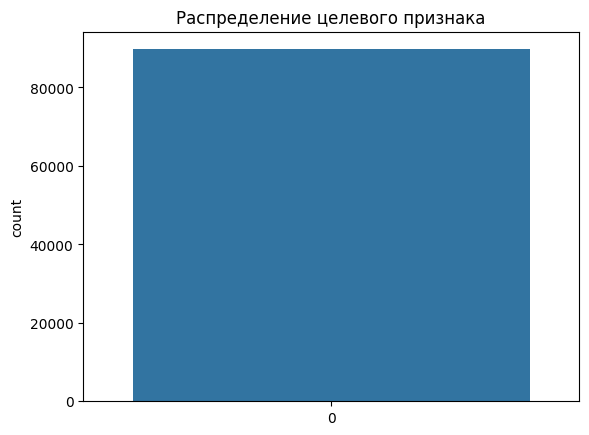

In [13]:
sns.countplot(df['MARKER'])
plt.title('Распределение целевого признака')
plt.show()

#### Видно сильный дисбаланс классов - применим SMOTE

In [44]:
smote = SMOTE()

X = df.drop('MARKER', axis=1)
y = df['MARKER']

X, y = smote.fit_resample(X, y)

ValueError: could not convert string to float: 'Woman'

#### Разбиваем выборку на train и test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Обучаем логистическую регрессию

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#### Оценка на train

In [ ]:
y_pred = log_reg.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

#### Оценка на test

In [ ]:
y_pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#### Поиск оптимальных гиперпараметров логистической регрессии

In [ ]:
params = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(log_reg, params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

#### Обучаем лучшую модель на всей train выборке

In [ ]:
best_log_reg = LogisticRegression(C=grid_search.best_params_['C'])
best_log_reg.fit(X_train, y_train)

#### Оценка лучшей модели на test выборке 

In [ ]:
y_pred = best_log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
best_log_reg.fit(X, y)
print('Финальная модель - логистическая регрессия')